In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [40]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Lname            0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

In [42]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Lname           object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [43]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,156.000000,156.000000,156.000000,126.000000,156.000000,156.000000,156.000000
mean,78.500000,0.346154,2.423077,28.141508,0.615385,0.397436,28.109587
std,45.177428,0.477275,0.795459,14.613880,1.056235,0.870146,39.401047
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,39.750000,0.000000,2.000000,19.000000,0.000000,0.000000,8.003150
50%,78.500000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,117.250000,1.000000,3.000000,35.000000,1.000000,0.000000,30.371850
max,156.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


In [44]:
missing_values=df.isnull().sum()
missing_values[missing_values>0]/len(df)*100

Age         19.230769
Cabin       80.128205
Embarked     0.641026
dtype: float64

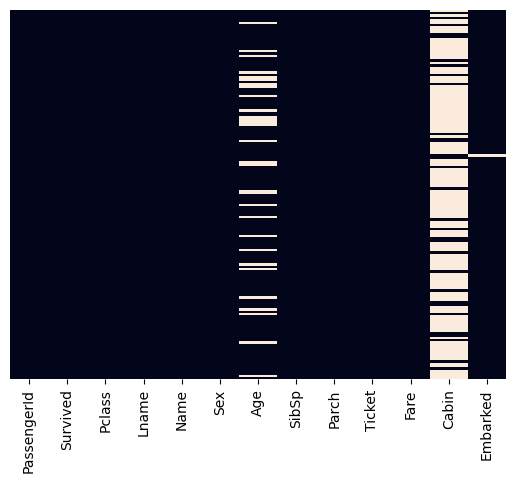

In [45]:
# Assuming 'df' is your DataFrame containing the data
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.show()

In [46]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Lname,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Braund,male,22.0,1,0,7.2500,S
1,1,1,Cumings,female,38.0,1,0,71.2833,C
2,1,3,Heikkinen,female,26.0,0,0,7.9250,S
3,1,1,Futrelle,female,35.0,1,0,53.1000,S
4,0,3,Allen,male,35.0,0,0,8.0500,S


In [47]:
df['Age']=df['Age'].fillna(df['Age'].mode()[0])
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [48]:
df.head()

,Survived,Pclass,Lname,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Braund,male,22.0,1,0,7.2500,S
1,1,1,Cumings,female,38.0,1,0,71.2833,C
2,1,3,Heikkinen,female,26.0,0,0,7.9250,S
3,1,1,Futrelle,female,35.0,1,0,53.1000,S
4,0,3,Allen,male,35.0,0,0,8.0500,S


In [49]:
df.isnull().sum()

Survived    0
Pclass      0
Lname       0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

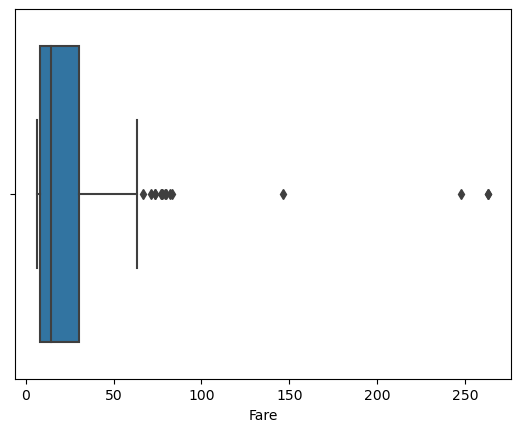

In [50]:
# Assuming 'df' is your DataFrame containing the data
sns.boxplot(x='Fare', data=df)
plt.show()

<Axes: >

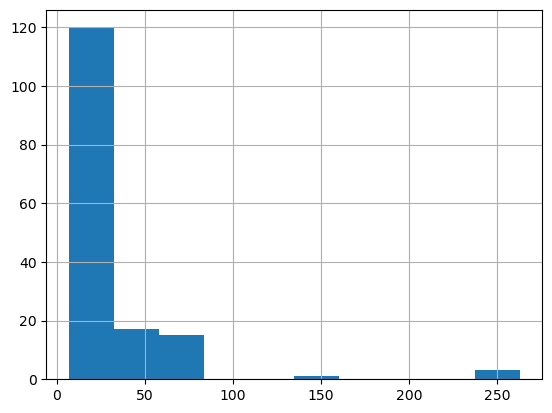

In [51]:
df['Fare'].hist()

In [52]:
print('skewness value of Age: ',df['Age'].skew())
print('skewness value of Fare: ',df['Fare'].skew())

skewness value of Age:  1.0089389653383978
skewness value of Fare:  4.176407980322076


In [53]:
# Assuming 'df' is your DataFrame containing the data and 'Fare' is a valid column in the DataFrame
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

print(IQR)

22.368699999999997


In [54]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Fare_outliers = df[(df['Fare'] < Q1 - whisker_width*IQR) | (df['Fare'] > Q3 + whisker_width*IQR)]
Fare_outliers.head()

,Survived,Pclass,Lname,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,Cumings,female,38.0,1,0,71.2833,C
27,0,1,Fortune,male,19.0,3,2,263.0000,S
31,1,1,Spencer,female,21.0,1,0,146.5208,C
34,0,1,Meyer,male,28.0,1,0,82.1708,C
52,1,1,Harper,female,49.0,1,0,76.7292,C


In [55]:
fare_mean = df['Fare'].mean()
fare_std = df['Fare'].std()
low= fare_mean -(3 * fare_std)
high= fare_mean + (3 * fare_std)
fare_outliers = df[(df['Fare'] < low) | (df['Fare'] > high)]
fare_outliers.head()

,Survived,Pclass,Lname,Sex,Age,SibSp,Parch,Fare,Embarked
27,0,1,Fortune,male,19.0,3,2,263.0000,S
31,1,1,Spencer,female,21.0,1,0,146.5208,C
88,1,1,Fortune,female,23.0,3,2,263.0000,S
118,0,1,Baxter,male,24.0,0,1,247.5208,C


In [56]:
# Assuming 'df' is your DataFrame containing the data and 'Fare' is a valid column in the DataFrame
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

whisker_width = 1.5
lower_whisker = Q1 - (whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)  # Removed the extra closing parenthesis here

df['Fare'] = np.where(df['Fare'] > upper_whisker, upper_whisker, np.where(df['Fare'] < lower_whisker, lower_whisker, df['Fare']))

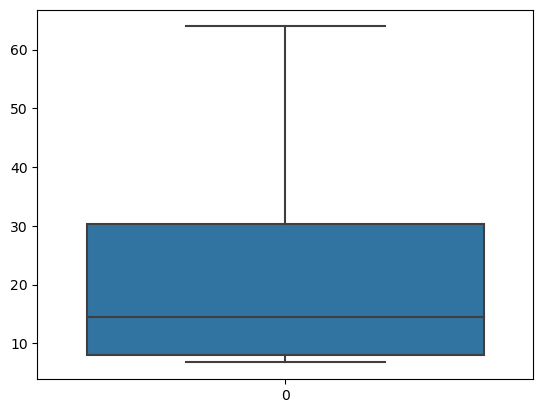

In [58]:
sns.boxplot(df['Fare'])
plt.show()

In [ ]:
Q1 = df['Fare'].quantile(0.10)
Q3 = df['Fare'].quantile(0.90)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
index=df['Fare'][(df['Fare']>upper_whisker)|(df['Fare']<lower_whisker)].index
df.drop(index,inplace=True)